# Stratified_GridSearchCV

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Wine

In [20]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [21]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

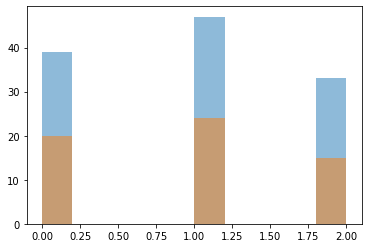

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [23]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 100, 'gamma': 0.001}

In [25]:
param_grid = {'degree' : [1, 2, 3, 4, 5], 
              'coef0': [0,1],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_2 = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'C': 100, 'coef0': 1, 'degree': 5}

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_3 = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'C': 0.1}

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_4 = GridSearchCV(linear_model.LogisticRegression(max_iter=10000), param_grid, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 100}

In [28]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [29]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

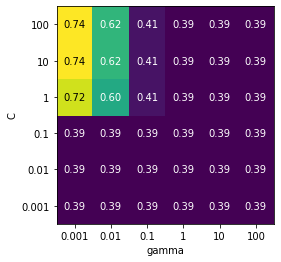

In [32]:
scores = np.array(results.mean_test_score).reshape(6, 6)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

In [34]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('LogReg', grid_4.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='micro') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='micro') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='micro'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='micro'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='micro'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.8135593220338984
recall_score: 0.8135593220338984
f1_score: 0.8135593220338985
accuracy_score: 0.8135593220338984
SVM poly
R^2: 0.9661016949152542
recall_score: 0.9661016949152542
f1_score: 0.9661016949152542
accuracy_score: 0.9661016949152542
SVM linear
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
LogReg
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


In [35]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM linear', 'SVM poly', 'LogReg'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.813559,0.813559,0.813559,0.813559
1,SVM linear,0.966102,0.966102,0.966102,0.966102
2,SVM poly,1.000000,1.000000,1.000000,1.000000
3,LogReg,1.000000,1.000000,1.000000,1.000000
